# Homework 04 #

Sternbauer, k11812499

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from IPython.display import Image

from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, roc_auc_score, roc_curve

from sklearn.utils import safe_sqr

random_seed = 12345

# Task 1 #
Use this dataset to perform the decision tree procedure **by hand** (you can check your answer with program, but the answer for this question need to be submitted by manually compute it with steps ) until all the records belong to the same class, which the variable cheat is the response variable. (*hint: use the entropy to find the best split.*)

Formular for entropy: $Entropy(t) = -\Sigma_{i=1}^{n}p_i log_2(p_i)$, where
- $p_i$ is the relative frequency of class $i$ at the node $t$

Formular for information gain: $IG = Entropy(p) - \Sigma_{i=1}^{k}\frac{n_i}{n}Entropy(i) = Entropy(p) - Entropy(p|i)$, where 
- $p$ is the parent node
- $k$ is the number of partitions
- $n_i$ number of records for a child $i$
- n is the number of records at the parent node $p$

### Level 1 split ###

#### Baseline ####
First, calculate the Entropy for the baseline, i.e. the non-splitted dataset

\begin{align*}
Entropy(base) &= -(\frac{7}{10} log_2(\frac{7}{10}) + \frac{3}{10} log_2(\frac{3}{10}))\\
&= -((-0.3602) + (-0.5210))\\
&= 0.8812
\end{align*}

Next, calculate the entropy / information gain for each feature

#### Refund ####

\begin{align*}
Entropy(base, refund) 
&= \frac{7}{10} * -(\frac{4}{7} log_2(\frac{4}{7}) + \frac{3}{7} log_2(\frac{3}{7}))\\
&+ \frac{3}{10} * -(\frac{3}{3} log_2(\frac{3}{3}) + \frac{0}{3} log_2(\frac{0}{3}))\\
&= \frac{7}{10} * -(-0.4613 + -0.5238) + \frac{3}{10} * -(0+0)\\
&= \frac{7}{10} * -(-0.9851) + \frac{3}{10}*  -(0) \\
&= 0.6895 + 0 \\
&= 0.6895
\end{align*}

\begin{align*}
IG &= Entropy(base) - Entropy(base, refund)\\
&= 0.8812 - 0.6895\\
&= 0.1917
\end{align*}

#### Marital Status ####

\begin{align*}
Entropy(base, Marital Status) 
&= \frac{4}{10} * -(\frac{2}{4} log_2(\frac{2}{4}) + \frac{2}{4} log_2(\frac{2}{4}))\\
&+ \frac{4}{10} * -(\frac{4}{4} log_2(\frac{4}{4}) + \frac{0}{4} log_2(\frac{0}{4}))\\
&+ \frac{2}{10} * -(\frac{1}{2} log_2(\frac{1}{2}) + \frac{1}{2} log_2(\frac{1}{2}))\\
&= \frac{4}{10} * -(-0.5 + -0.5) + \frac{4}{10} * -(0+0) + \frac{2}{10} * -(-0.5+ -0.5)\\
&= \frac{4}{10} * -(-1) + \frac{4}{10} * (0) + \frac{2}{10} * -(-1)\\
&= 0.4 + 0 + 0.2 \\
&= 0.6
\end{align*}

\begin{align*}
IG &= Entropy(base) - Entropy(base, Marital Status)\\
&= 0.8812 - 0.6\\
&= 0.2812
\end{align*}

#### Taxable income ####

\begin{align*}
Entropy(base, Taxable Income) 
&= \frac{3}{10} * -(\frac{3}{3} log_2(\frac{3}{3}) + \frac{0}{3} log_2(\frac{0}{3})\\
&+ \frac{7}{10} * -(\frac{4}{7} log_2(\frac{4}{7} + \frac{3}{7} log_2(\frac{3}{7})\\
&= \frac{3}{10} * -(0+0) + \frac{7}{10} * -(-0.4613 + -0.5238)\\
&= \frac{3}{10} * 0 + \frac{7}{10} * 0.9851\\
&= 0 + 0.6895\\
&= 0.6895
\end{align*}

\begin{align*}
IG &= Entropy(base) - Entropy(base, Taxable Income)\\
&= 0.8812 - 0.6895\\
&= 0.1917
\end{align*}

Based on the entropy calculations, **Marital Status** splitting has the highest information gain. There are now three new subtables, one for each marital status "Single", "Married", "Divorced"

Married:

| Refund | Taxable Income | Cheat (Target) |
|--------|----------------|----------------|
| No     | >80k           | No             |
| Yes    | >80k           | No             |
| No     | <80k           | No             |
| No     | <80k           | No             |

Divorced:

| Refund | Taxable Income | Cheat (Target) |
|--------|----------------|----------------|
| No     | >80k           | Yes            |
| Yes    | >80k           | No             |

Single:

| Refund | Taxable Income | Cheat (Target) |
|--------|----------------|----------------|
| Yes    | >80k           | No             |
| No     | <80k           | No             |
| No     | >80k           | Yes            |
| No     | >80k           | Yes            |


**Assumptions that can be made:**
Married is already perfectly split. All target variables have the class "No", therefore we don't have to perform any more splits. This means that whenever in the first decision the variable for a row entry is Married, we can automatically classify it with "No" (we met a stopping criteorion).

For divorced, the target value is the negative of our refund value, i.e. if refund is No, cheat will be Yes and the other way around. This means that whenever the first decision is "Divorced", we only need to look at the refund variable next and can automatically draw the conclusion (splitting by refund would maximize the information gain and minimize the entropy).

Therefore, only Single has to be calculated again as there is no obvois split at the moment.

### Level 2 - Single ###

#### Baseline ####

\begin{align*}
Entropy(Single)
&= -(\frac{2}{4} log_2(\frac{2}{4}) - \frac{2}{4} log_2(\frac{2}{4})\\
&= 1
\end{align*}

#### Refund ####

\begin{align*}
Entropy(Single, Refund)
&= \frac{3}{4} * (-\frac{1}{3} log_2(\frac{1}{3}) - \frac{2}{3} log_2(\frac{2}{3})\\
&+ \frac{1}{4} * (-\frac{1}{1} log_2(\frac{1}{1}) - \frac{0}{1} log_2(\frac{0}{1})\\
&= \frac{3}{4} * (0.5283 - -0.3899) + \frac{1}{4} * (0+0) \\
&= \frac{3}{4} * 0.9192\\
&= 0.6894
\end{align*}

\begin{align*}
IG &= Entropy(Single) - Entropy(Single, Refund)\\
&= 1 - 0.6894\\
&= 0.3106
\end{align*}

#### Taxable Income ####
\begin{align*}
Entropy(Single, Taxable Income)
&+ \frac{1}{4} * (-\frac{1}{1} log_2(\frac{1}{1}) - \frac{0}{1} log_2(\frac{0}{1})\\
&= \frac{3}{4} * (-\frac{1}{3} log_2(\frac{1}{3}) - \frac{2}{3} log_2(\frac{2}{3})\\
&= \frac{1}{4} * (0+0) + \frac{3}{4} * (0.5283 - -0.3899)\\
&= \frac{3}{4} * 0.9192\\
&= 0.6894
\end{align*}

\begin{align*}
IG &= Entropy(Single) - Entropy(Single, Taxable Income)\\
&= 1 - 0.6894\\
&= 0.3106
\end{align*}

**Assumptions that can be made:**
For both taxable income and refund, the entropy and information gain are the same. I will choose Refund as the splitting criterion. Furtheron, this will split the dataset into one where we can immediatly do the classification (No) and anotherone where the decision can be made by the Taxable Income, as it is clearly visible in the resulting table.

Refund: Yes

| Taxable Income | Cheat (Target) |
|----------------|----------------|
| >80k           | No             |

Refund: No

| Taxable Income | Cheat (Target) |
|----------------|----------------|
| <80k           | No             |
| >80k           | Yes            |
| >80k           | Yes            |

The final decision tree looks like this:

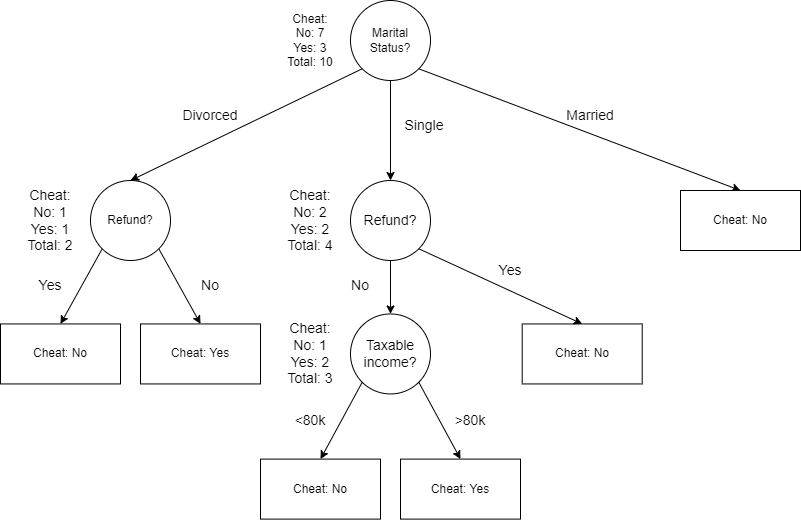

In [2]:
i = Image(filename='img/decision_tree.png')
display(i)

# Task 2 #

### Variable Description ###

- Read the data with `read.csv(“https://hastie.su.domains/ElemStatLearn/datasets/SAheart.data”,sep=“,”head=T,row.names=1)`
- Data description refers to [this link](https://hastie.su.domains/ElemStatLearn/datasets/SAheart.info.txt)
- The response variable is **chd**: coronary heart disease.

## 2.1 Binary classification of the heart disease dataset ##

In the first set of tasks, you will evaluate a number of popular classifiers for our
dataset.

**-** Explore the data: What is the proportion of present of the heart disease or not? Obtain descriptions of the predictors – mean, standard deviations, etc. for real-valued attributes. Is there anything noteworthy in the data? Are there any attributes you need to consider omitting from your analysis?

In [3]:
data = pd.read_csv('https://hastie.su.domains/ElemStatLearn/datasets/SAheart.data')

In [4]:
display(data.head(10))
print('\ndShape:', data.shape)

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
5,6,132,6.20,6.47,36.21,Present,62,30.77,14.14,45,0
6,7,142,4.05,3.38,16.20,Absent,59,20.81,2.62,38,0
7,8,114,4.08,4.59,14.60,Present,62,23.11,6.72,58,1
8,9,114,0.00,3.83,19.40,Present,49,24.86,2.49,29,0
9,10,132,0.00,5.80,30.96,Present,69,30.11,0.00,53,1



dShape: (462, 11)


In [5]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   row.names  462 non-null    int64  
 1   sbp        462 non-null    int64  
 2   tobacco    462 non-null    float64
 3   ldl        462 non-null    float64
 4   adiposity  462 non-null    float64
 5   famhist    462 non-null    object 
 6   typea      462 non-null    int64  
 7   obesity    462 non-null    float64
 8   alcohol    462 non-null    float64
 9   age        462 non-null    int64  
 10  chd        462 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 39.8+ KB


None

**-** Document any pre-processing required to make the data set suitable for the model
fitting.

In [6]:
data[data.isna().any(axis=1)]

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd


There are no rows which have null values, therefore clearing the dataframe of null values can be ommitted.

Next, drop the row.names column and encode the famhist into a numeric value

In [7]:
if 'row.names' in data.columns:
    data = data.drop(['row.names'], axis=1)
    display(data)

if 'famhist' in data.columns:
    encoder = LabelEncoder()
    data['famhist'] = encoder.fit_transform(data['famhist'])
display(data)
display(data.info())

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,0,64,28.45,0.00,58,0
458,182,4.20,4.41,32.10,0,52,28.61,18.72,52,1
459,108,3.00,1.59,15.23,0,40,20.09,26.64,55,0
460,118,5.40,11.61,30.79,0,64,27.35,23.97,40,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        462 non-null    int64  
 1   tobacco    462 non-null    float64
 2   ldl        462 non-null    float64
 3   adiposity  462 non-null    float64
 4   famhist    462 non-null    int32  
 5   typea      462 non-null    int64  
 6   obesity    462 non-null    float64
 7   alcohol    462 non-null    float64
 8   age        462 non-null    int64  
 9   chd        462 non-null    int64  
dtypes: float64(5), int32(1), int64(4)
memory usage: 34.4 KB


None

Let's dig a bit into the different value ranges for all columns, and for numberical attributes that are not encoding something categorical have a look at some statistical descriptors

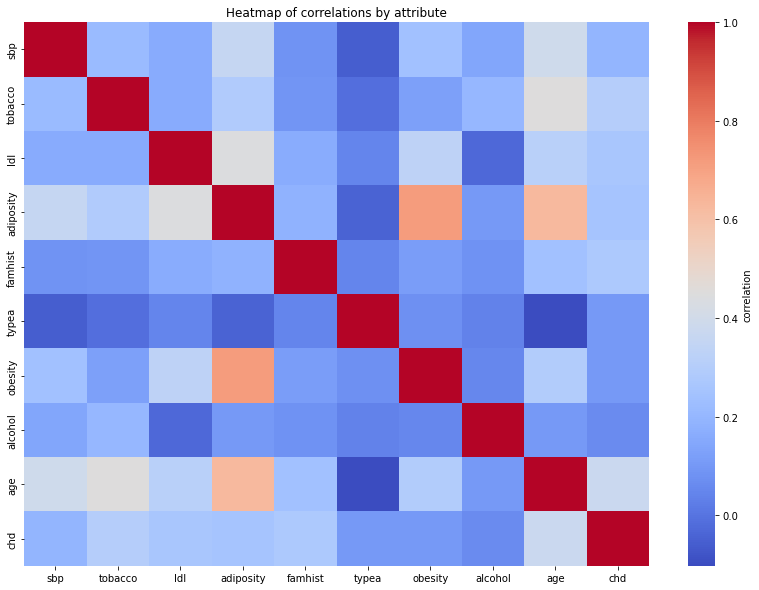

In [8]:
fig, ax = plt.subplots(figsize=(14,10))
cmap = sns.color_palette("coolwarm", as_cmap=True)
sns.heatmap(data=data.corr(), cmap=cmap, cbar_kws={'label': 'correlation'})
plt.title('Heatmap of correlations by attribute')
plt.show()

From the heatmap, it may be concluded that adiposity has a strong crrelation with obesity and age, otherwise there are not that many strong correlations between two attributes.

In [9]:
print('Value range for each column:\n')
for col in data.columns:
    if data[col].dtype in [np.int64, np.int32, float]:
        print(f'"{col}": [{data[col].min()} ... {data[col].max()}]')
    else:
        print(f'"{col}":', data[col].unique())

Value range for each column:

"sbp": [101 ... 218]
"tobacco": [0.0 ... 31.2]
"ldl": [0.98 ... 15.33]
"adiposity": [6.74 ... 42.49]
"famhist": [0 ... 1]
"typea": [13 ... 78]
"obesity": [14.7 ... 46.58]
"alcohol": [0.0 ... 147.19]
"age": [15 ... 64]
"chd": [0 ... 1]


In [10]:
good_cols = ["sbp", "tobacco", "ldl", "adiposity", "typea", "obesity", "alcohol", "age"]

for col in good_cols:
    mean = data[col].mean()
    stddev = data[col].std()
    print(f'{col}\n    Mean: {mean}\n    SDev: {stddev}\n')

sbp
    Mean: 138.32683982683983
    SDev: 20.496317175467627

tobacco
    Mean: 3.635649350649348
    SDev: 4.593024078404595

ldl
    Mean: 4.7403246753246835
    SDev: 2.0709091610593258

adiposity
    Mean: 25.40673160173159
    SDev: 7.7806985958397625

typea
    Mean: 53.103896103896105
    SDev: 9.817534115584083

obesity
    Mean: 26.044112554112576
    SDev: 4.213680226897765

alcohol
    Mean: 17.044393939393952
    SDev: 24.481058691658568

age
    Mean: 42.816017316017316
    SDev: 14.60895644455249



CHD=0: 302
CHD=1: 160
Proportion: 1.89 : 1


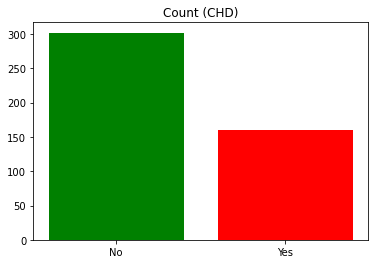

In [11]:
# cases of chd and not
target_count = data.chd.value_counts()
count_0, count_1 = target_count
print('CHD=0:', count_0)
print('CHD=1:', count_1)
print('Proportion:', round(count_0 / count_1, 2), ': 1')

plt.bar([0,1], [count_0, count_1], color=['green', 'red'])
plt.xticks([0, 1], ["No", "Yes"])
plt.title('Count (CHD)')
plt.show()

The plot shows roughly a 1.9:1 ratio for people in our dataset which have no chronic heart disease compared to people with a CHD. That is an imbalance that has to be fixed.


After sampling:
CHD=0: 160
CHD=1: 160


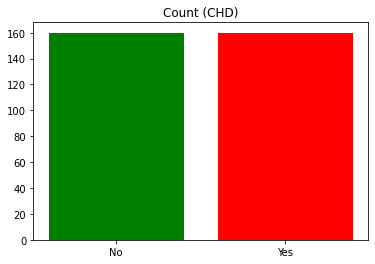

In [12]:
data_0 = data[data['chd'] == 0]
data_1 = data[data['chd'] == 1]

data_0_sampled = data_0.sample(count_1, replace=True, random_state=random_seed)
data_sampled = pd.concat([data_1,data_0_sampled], axis=0)

print(f'\nAfter sampling:\nCHD=0: {data_sampled.chd.value_counts()[0]}\nCHD=1: {data_sampled.chd.value_counts()[1]}')

plt.bar([0,1], [data_sampled.chd.value_counts()[0], data_sampled.chd.value_counts()[1]], color=['green', 'red']);
plt.xticks([0, 1], ["No", "Yes"])
plt.title('Count (CHD)')
plt.show()

data = data_sampled

Findings on the data:
- There was an inbalance of the target label CHD, which has been fixed
- Both tobacco and ldl have high standard diviations compared to their mean value, in the case of the former the mean is around 3.6, but the standard deviatin is around 4.6. This could mean that there are outliers for both tabacco and ldl.
- From just looking at the data, there are no obvious attributes which do not have a meaning on their own and would have repeating data (like a day-tag when the different measurements where taken).

**-** Clean the dataset and split it into training (70%) and test data (30%) with
random seed 12345.

In [13]:
train, test = train_test_split(data, test_size=0.3, random_state=random_seed)
print(f'Samples in training set: {len(train)}\nSamples in test set: {len(test)}')

print('\ntrain shape', train.shape)
print('test shape', test.shape)

X_train = train.loc[:, train.columns != 'chd']
y_train = train['chd']
X_test = test.loc[:, test.columns != 'chd']
y_test = test['chd']

print('\nX_train shape', X_train.shape)
print('y_train shape', y_train.shape)
print('X_test shape', X_test.shape)
print('y_test shape', y_test.shape)

Samples in training set: 224
Samples in test set: 96

train shape (224, 10)
test shape (96, 10)

X_train shape (224, 9)
y_train shape (224,)
X_test shape (96, 9)
y_test shape (96,)


**-** Fitting
- Fit a decision tree using the training data and plot the tree.
- Fit a logistic regression classifier using the training data.
- Fit a random forest classifier using the training data.
- Fit a bagged tree using the training data.
- Fit an LDA classifier using the training data.
- Fit a QDA classifier using the training data.

For the sake of keeping the code to a minimum and especially to keep the results alltogether for evaluation in a single array, all models will be trained here, their values saved to a dict and later on be evaluated

In [14]:
classifierName=[
    'Decision Tree Classifier',
    'Logistic Regression',
    'Random Forest Classifier',
    'Bagging Classifier',
    'LDA',
    'QDA'
]
classifiers=[
    DecisionTreeClassifier(random_state = random_seed),
    LogisticRegression(max_iter=1000, random_state = random_seed),
    RandomForestClassifier(random_state = random_seed),
    BaggingClassifier(random_state = random_seed),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()
]

# Train the models
models = {}
for i, classifier in enumerate(classifiers):
    trained_model = classifier.fit(X_train, y_train)
    models[classifierName[i]] = trained_model

Next, the decision tree is plotted

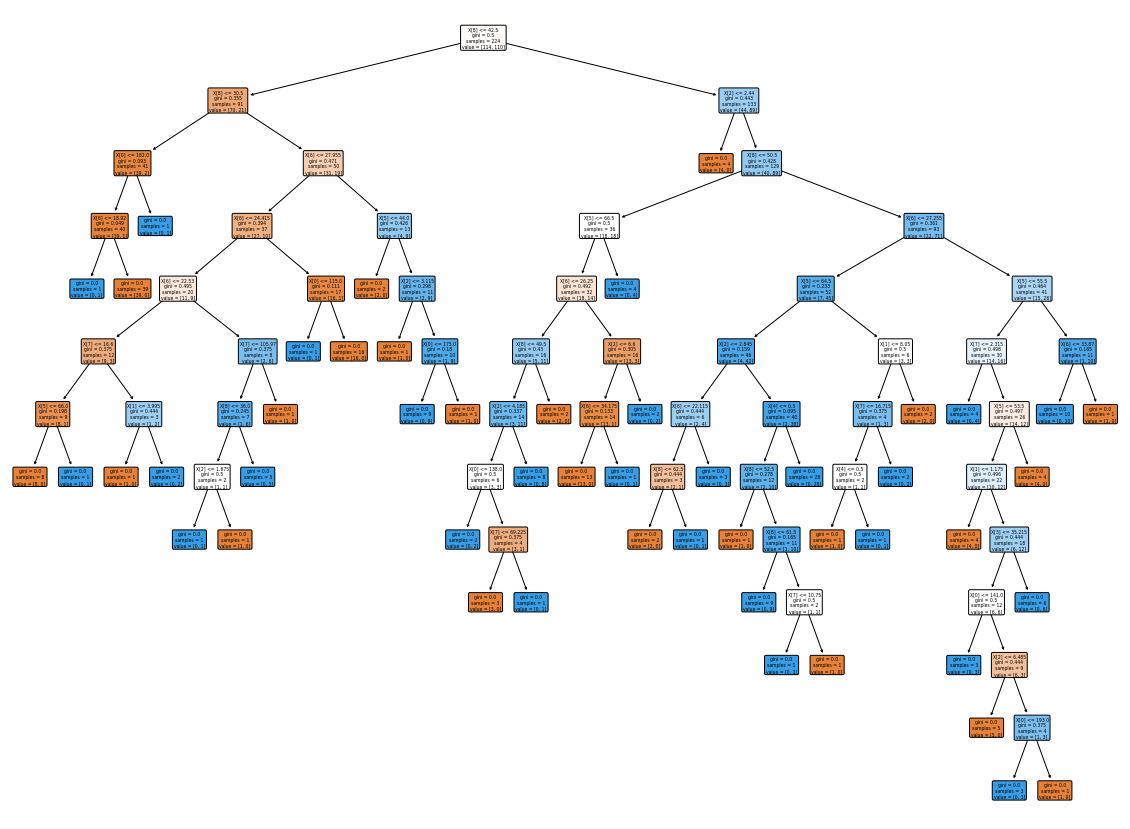

In [15]:
fig = plt.figure(figsize=(20, 15))
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
tree.plot_tree(tree_model, filled=True, impurity=True, rounded=True)
plt.show(fig)

The whole tree is rather hard to read, therefore it is plotted again with a restricte max depth to 4. This number seemed to be a good balance between readability and still showing the complexity somehow.

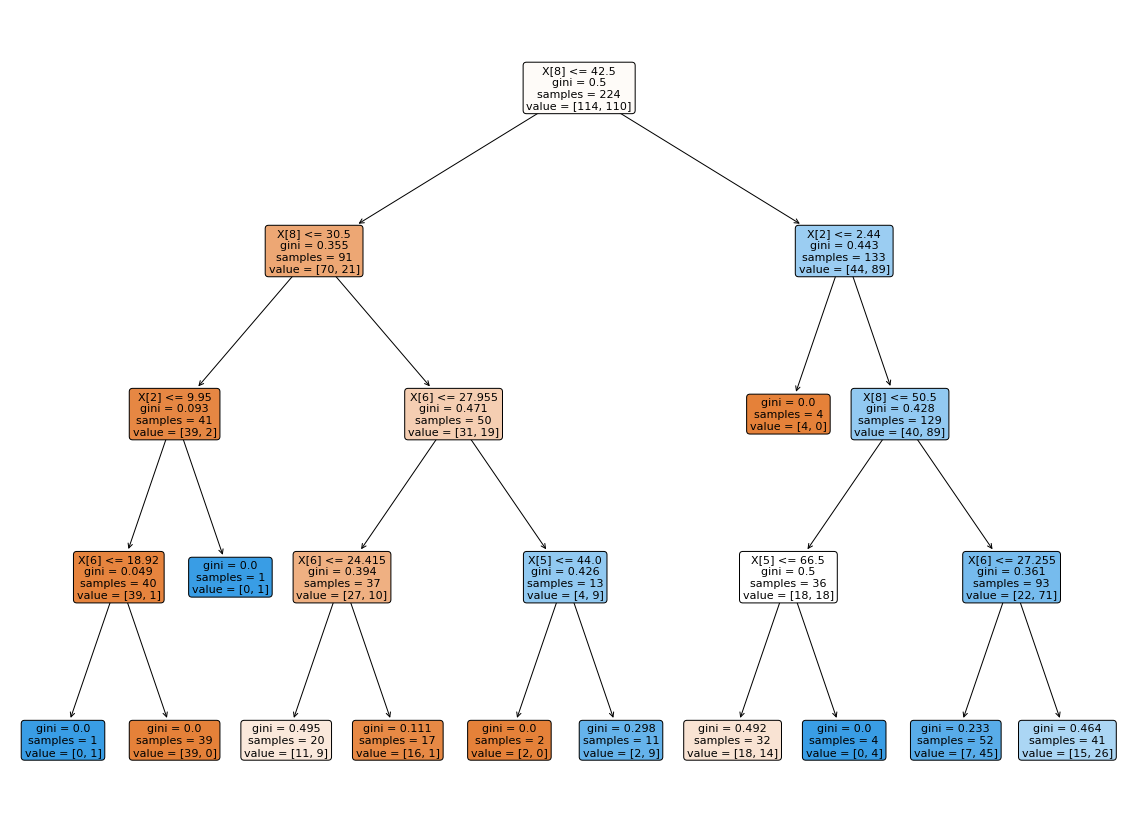

In [16]:
fig = plt.figure(figsize=(20, 15))
tree_model = DecisionTreeClassifier(max_depth=4) # 4 is a decent balance between readability and not being oversimplified
tree_model.fit(X_train, y_train)
tree.plot_tree(tree_model, filled=True, impurity=True, rounded=True)
plt.show(fig)

## 2.2 Exploration of different evaluation metrics for binary classification ##

Now, we are going to evaluate different metrics for the binary classification models that we have created so far.

For each model above:

- Print and interpret the confusion matrix and the accuracy rate of the test data.
- Print the ROC curves in one plot, and label their AUC values. Make a comparison for these classifiers (Avoid the ROC with only 3 points, you might need some modifications for some ROC functions to achieve this).
- Use 5-fold cross validation to evaluate all your models and compare the results.
- Base on all the results above, create a table comparing the results in 3.1 and 3.2, compare all fitted classifiers together in detail. Is there a single ‘best’ classifier?
- Examining each of the models, determine the most important variables in predicting whether or not a person will have heart disease. Which variables could be omitted from the data with very little effect on performance? Give reasons.

### Evaluation on confusion matrix and accuracy rate ###

The first evaluation will be on the accuracy, recall and precision scores of the models, alongside their confusion matrices

----- Evaluation for Decision Tree Classifier -----
Accuracy: 0.65625

Recall (CHD=0): 0.7608695652173914
Recall (CHD=1): 0.56

Precision (CHD=0): 0.6140350877192983
Precision (CHD=1): 0.717948717948718

Confusion Matrix:
 [[35 11]
 [22 28]]


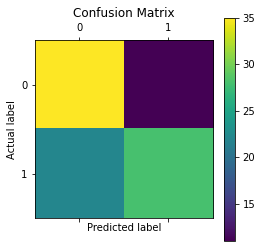

----- Evaluation for Logistic Regression -----
Accuracy: 0.6979166666666666

Recall (CHD=0): 0.782608695652174
Recall (CHD=1): 0.62

Precision (CHD=0): 0.6545454545454545
Precision (CHD=1): 0.7560975609756098

Confusion Matrix:
 [[36 10]
 [19 31]]


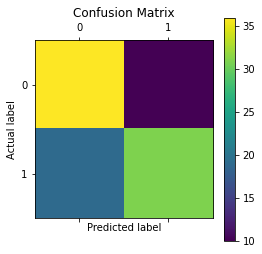

----- Evaluation for Random Forest Classifier -----
Accuracy: 0.7291666666666666

Recall (CHD=0): 0.8478260869565217
Recall (CHD=1): 0.62

Precision (CHD=0): 0.6724137931034483
Precision (CHD=1): 0.8157894736842105

Confusion Matrix:
 [[39  7]
 [19 31]]


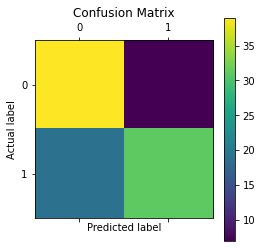

----- Evaluation for Bagging Classifier -----
Accuracy: 0.6354166666666666

Recall (CHD=0): 0.8478260869565217
Recall (CHD=1): 0.44

Precision (CHD=0): 0.582089552238806
Precision (CHD=1): 0.7586206896551724

Confusion Matrix:
 [[39  7]
 [28 22]]


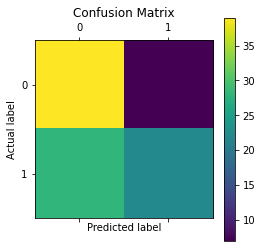

----- Evaluation for LDA -----
Accuracy: 0.71875

Recall (CHD=0): 0.782608695652174
Recall (CHD=1): 0.66

Precision (CHD=0): 0.6792452830188679
Precision (CHD=1): 0.7674418604651163

Confusion Matrix:
 [[36 10]
 [17 33]]


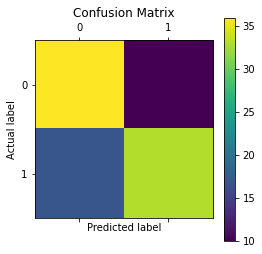

----- Evaluation for QDA -----
Accuracy: 0.6875

Recall (CHD=0): 0.782608695652174
Recall (CHD=1): 0.6

Precision (CHD=0): 0.6428571428571429
Precision (CHD=1): 0.75

Confusion Matrix:
 [[36 10]
 [20 30]]


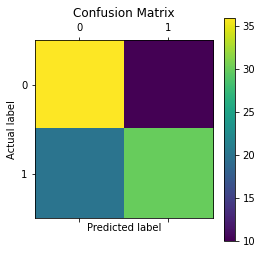

In [17]:
TP, TN, FP, FN = [],[],[],[]
missclass = []
for name in classifierName:
    print(f'----- Evaluation for {name} -----')    
    model = models[name]
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    conf = confusion_matrix(y_test, y_pred)
    rec_result = recall_score(y_test, y_pred, average=None, labels=[0,1])
    prec_result = precision_score(y_test, y_pred, average=None, labels=[0,1])
    
    (tn, fp), (fn, tp) = conf
    TP.append(tp)
    TN.append(tn)
    FP.append(fp)
    FN.append(fn)
    missclass.append(sum(y_test != y_pred))
    
    print(f'Accuracy: {acc}\n')
    print(f'Recall (CHD=0): {rec_result[0]}')
    print(f'Recall (CHD=1): {rec_result[1]}\n')
    print(f'Precision (CHD=0): {prec_result[0]}')
    print(f'Precision (CHD=1): {prec_result[1]}\n')
    print(f'Confusion Matrix:\n {conf}')
    
    plt.matshow(conf)
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()
    
    

Both the Random Forest and the Bagging Classifier have the highest rate of accuratly classified positives (TP). However, only the former can also boost a good rate for correctly classified negatives (TN), whereas the latter produces a lot more false positives (FP). This is also reflected in the overall accuracy score, where Random Forests are the winner with a small margin to LDA. The Bagging Classifier is the worst in this measurement.  
All classifier have a higher recall score for non-CHD samples, but the precision is also higher for al CHD-samples. This can be interpreted such that a larger proportion non-CHD get identified correctly. However, for CHD-samples the classification is more precise, i.e. a CHD=1 classified sample is much more likely to be really CHD=1 and not wrongly classified as negative

### ROC curves in one plot ###

As stated in the instructions, the ROC with 3 points only is ignored, which in this case is the Decision Tree Classifier. It is therefore not printed into the graph, but the AUC is still printed

AUC score for Decision Tree Classifier: 0.6604347826086957
AUC score for Logistic Regression: 0.701304347826087
AUC score for Random Forest Classifier: 0.7339130434782609
AUC score for Bagging Classifier: 0.6439130434782608
AUC score for LDA: 0.7213043478260871
AUC score for QDA: 0.691304347826087


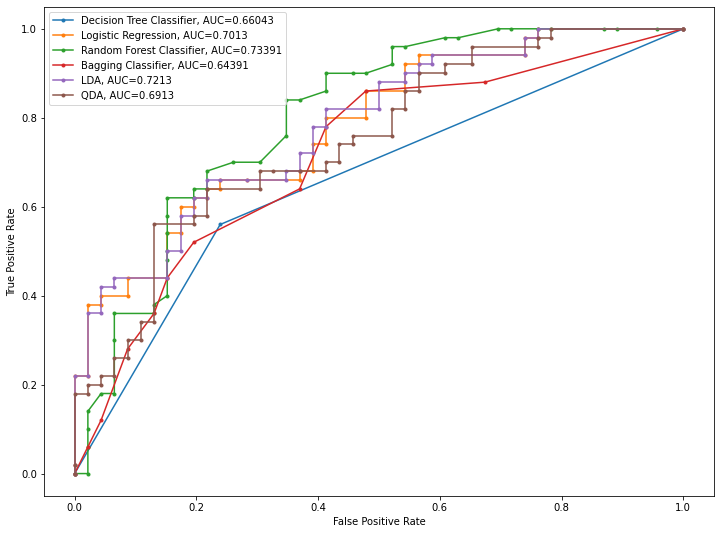

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(12, 9))
auc_scores = []
for classifier in classifierName:
    model = models[classifier]
    y_pred = model.predict(X_test)
    auc_score = roc_auc_score(y_test, y_pred)
    auc_scores.append(auc_score)
    print(f'AUC score for {classifier}:', auc_score)
    predict_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, predict_proba)
    plt.plot(fpr, tpr, marker='.', label=classifier+', AUC='+str(round(auc_score, 5)))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

The AUC scores are all relatively close together, with the Random Forest showing the best performance. Together with LDA and Logistic Regression, which are the next best, these are the only ones to get an AUC of higher than 70%. The worst score belongs to the Bagging Classifier, aga8in, which only manages around 64% AUC and this can also be seen in the chart rather clearly. The Decision Tree classifier has the second-worst performance, only slightly better than the Bagging Classifier.

### 5Fold Cross-Validation

In [19]:
kfold5 = KFold(n_splits=5, random_state=random_seed, shuffle=True)

means={}
stds={}
cv_results = []

for i, classifier in enumerate(classifiers):
    cv_res = cross_val_score(classifier, X_train, y_train, cv=kfold5, scoring='accuracy')
    print(f'{classifierName[i]}, cv_res: {cv_res}')
    mean_acc = cv_res.mean()
    print(f'CV 5 fold mean accuracy score for {classifierName[i]}:', mean_acc)
    means[classifierName[i]] = mean_acc
    stds[classifierName[i]] = cv_res.std()
    cv_results.append(cv_res)
    
display(pd.DataFrame({'Mean' : means, "Std": stds}, index=classifierName))

Decision Tree Classifier, cv_res: [0.77777778 0.66666667 0.75555556 0.6        0.5       ]
CV 5 fold mean accuracy score for Decision Tree Classifier: 0.66
Logistic Regression, cv_res: [0.66666667 0.71111111 0.73333333 0.64444444 0.65909091]
CV 5 fold mean accuracy score for Logistic Regression: 0.6829292929292929
Random Forest Classifier, cv_res: [0.75555556 0.8        0.71111111 0.64444444 0.68181818]
CV 5 fold mean accuracy score for Random Forest Classifier: 0.7185858585858586
Bagging Classifier, cv_res: [0.62222222 0.82222222 0.73333333 0.66666667 0.61363636]
CV 5 fold mean accuracy score for Bagging Classifier: 0.6916161616161616
LDA, cv_res: [0.64444444 0.73333333 0.75555556 0.62222222 0.65909091]
CV 5 fold mean accuracy score for LDA: 0.6829292929292929
QDA, cv_res: [0.57777778 0.68888889 0.73333333 0.75555556 0.70454545]
CV 5 fold mean accuracy score for QDA: 0.692020202020202


,Mean,Std
Decision Tree Classifier,0.660000,0.102222
Logistic Regression,0.682929,0.033611
Random Forest Classifier,0.718586,0.054589
Bagging Classifier,0.691616,0.077868
LDA,0.682929,0.052057
QDA,0.692020,0.061582


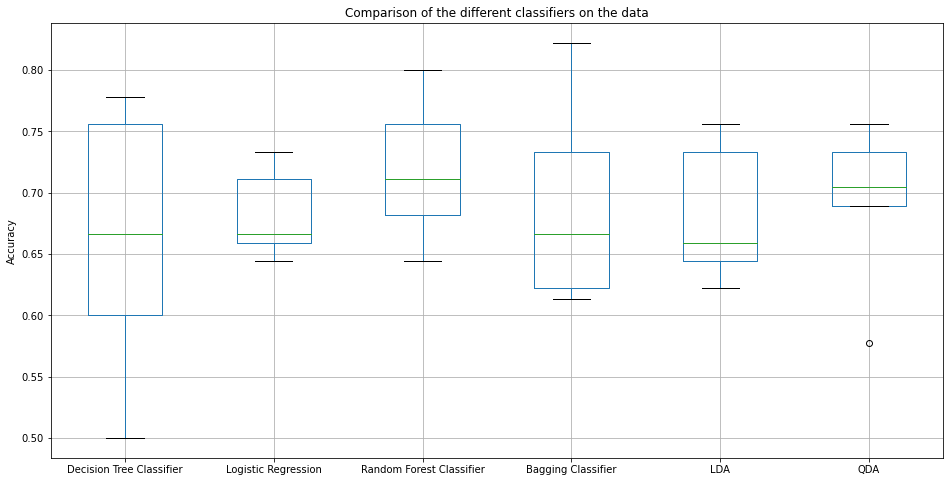

In [20]:
plt.subplots(figsize=(16,8))
df_box = pd.DataFrame(cv_results, index=classifierName)
plt.title('Comparison of the different classifiers on the data')
plt.ylabel('Accuracy')
df_box.T.boxplot();

When taking into account factors such as the spread of variables, the ranges of quartiles and such, the Random Forest Classifier once again proofs to be probable best choice. It does not have the highest maximum value, this one belongs to the Bagging Classifier, but its median score is the highest of all and it has the highest minimum value, plus no outliers. For this analysis, QDA does a good job as well, but has one outlier on the lower accuracy side. The Decision Tree performas rather poorly, with a large interquartil distance, a below-average median value and the lowest minimum score of all, even lower than the QDA outlier. Logitistic Regression and LDA both do a decent job, but cannot outperform the Random Forest Classifier.

### Compare classifiers ####

In [21]:
display(pd.DataFrame({'5fold CV mean' : means, '5F CV Std': stds, 'AUC Score' : auc_scores, 
                      'True positives' : TP, 'True Negatives' : TN, 'False Positives' : FP, 'False Negatives' : FN, 'Missclassifications' : missclass}, 
                     index=classifierName))

,5fold CV mean,5F CV Std,AUC Score,True positives,True Negatives,False Positives,False Negatives,Missclassifications
Decision Tree Classifier,0.660000,0.102222,0.660435,28,35,11,22,33
Logistic Regression,0.682929,0.033611,0.701304,31,36,10,19,29
Random Forest Classifier,0.718586,0.054589,0.733913,31,39,7,19,26
Bagging Classifier,0.691616,0.077868,0.643913,22,39,7,28,35
LDA,0.682929,0.052057,0.721304,33,36,10,17,27
QDA,0.692020,0.061582,0.691304,30,36,10,20,30


The 5-fold crossvalidation once again has the Random Forest on top of the list. It produces the least missclassifications, therefore has the highest mean score, the highest AUC (as already discussed earlier) and favourable TP/TN numbers. Only the second-best LDA comes close in terms of missclassifications and beats the Random Forests in terms of true positives. Apart from the Decision Tree, the other classifiers have mean values rather close together, however they do differ in their standard deviation.  
Bagging Classifier has the highest number of misses and by far the lowest number of true positives. The precision in terms of true negatives however is on par with well performing classifiers. QDA and Logistic regression both perform on average, without any runaway values compared to others.

Overall, it can be said that the Random Forest do perform the best overall, but not by a huge margin. LDA shows comparable performance as well, outperforming the forest in terms of true positives and only having one more missclassification. It also has the lowest number of false negative samples. Decision Trees and Bagging Classifiers show the least appealing results and may be named the worst classifiers for this task on hand.

### Variable importance analysis

#### PCA

Before the actual split of data into the train/test set and model training, I decided to do an PCA to get a feeling which attributes may have a higher importance and which have a lower influene based on the principal component analysis. This is done as we should also evaluate the influence of different attributes on the results and show if any values may be omitted.

In [22]:
scaler = MinMaxScaler()
data_std = data.copy()
data_std[:] = scaler.fit_transform(data_std)
sort_data_std = np.sort(np.linalg.eigvals(data_std.corr()))[::-1]
print(sort_data_std)

comps = (sort_data_std > 1.0).sum()
print(comps)

[3.14594196 1.2906451  1.11233933 1.04396368 0.89697447 0.7290996
 0.6508313  0.5714805  0.39606302 0.16266104]
4


Threre are 4 Eigenvalues which have a value of 1 or greater, these will be tasken into consideration for the PCA, which will be done with 4 components

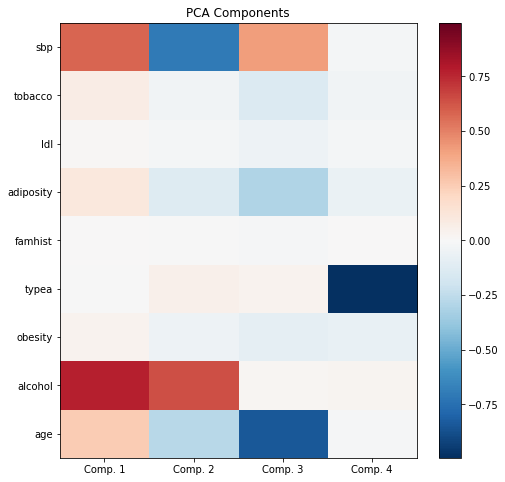

In [23]:
pca = PCA(n_components=comps)
temp = data.copy()

del temp['chd'] # Drops the chd columns

ret = pca.fit(temp)
components = ret.components_.T

# Visualize the result
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
vmax = np.abs(components).max()
img = ax.imshow(components, cmap="RdBu_r", vmax=vmax, vmin=-vmax, aspect='auto')
fig.colorbar(img)
features = data.copy().columns.drop('chd')
ax.set_yticks(np.arange(len(features)))
ax.set_yticklabels(features)
ax.set_title('PCA Components')
ax.set_xticks([i for i in range(0, comps)])
ax.set_xticklabels([f'Comp. {i}' for i in range(1, comps+1)])
plt.show()

The analysis shows that four components mostly ignore `Idl` and `famhist`, also `obesity` and `tobacco` have a lower influence on/correlation with them. Component 4 is nearly exclusivly influenced by `typea`. `Age`, `Alcohol` and `SBP` on the other hand have very high/string influences on the three first components.

In the following, for all trained model I analysed the different feature importances, in case this is possible.

### Feature importance on models

#### Decision Tree Classifier

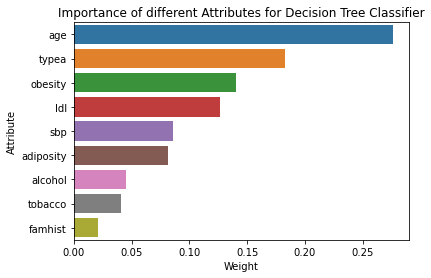

In [24]:
name = classifierName[0]
model = models[name]
attribute_weights = pd.DataFrame({
    'Attribute' : X_train.columns,
    'Weight' : model.feature_importances_
}).sort_values(by='Weight', ascending=False)
plt.title(f'Importance of different Attributes for {name}')
sns.barplot(data = attribute_weights, x='Weight', y='Attribute');
plt.show()

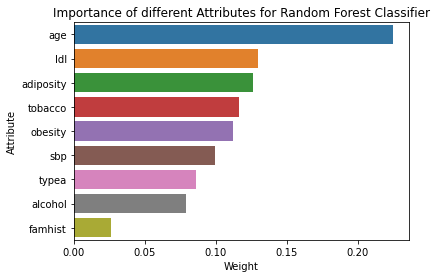

In [25]:
name = classifierName[2]
model = models[name]
attribute_weights = pd.DataFrame({
    'Attribute' : X_train.columns,
    'Weight' : model.feature_importances_
}).sort_values(by='Weight', ascending=False)
plt.title(f'Importance of different Attributes for {name}')
sns.barplot(data = attribute_weights, x='Weight', y='Attribute');
plt.show()

For both classifiers, where the feature importance could be extracted from the model itself, `age` is the most important attribute. `Famhist` is the least important one for both, alcohol does also play less of a role. `Sbp` is in the middle. For others like `typea`, that is important for Decision Trees, are not important for the Random Forest.

## Conclusion ##

Overall, the Random Forest Classifier worked the best. It had the most balanced mixture between true positives and true negatives and the smallest number of missclassifications. It also features the highest AUC and 5-fold CV score. Decision Trees and Bagging Classifiers show the least favourable results and should be avoided for this task. LDA comes close to the Random Forest in performance, but cannot quite match all the values, even though it has more true positive values, but less true negatives and one more missclassifications.

The preprocessing took some time, especially to balance the number of bothtarget values, this was done to bring the CHD=0 samples down to the level of CHD=1 with random sampling. All models, samplers and splitters have been initialized with the same random seed (12345) to garuantee reproducable performance.